In [16]:
import numpy as np
import matplotlib.pyplot as plt
# Adaptive learning method algorithms (Adam is a combination of two other extensions of stochastic gradient descent "Adagrad", "RMSprop")
import keras
# Sequential model is a linear stack of layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
%matplotlib inline

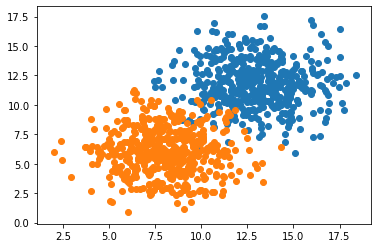

In [44]:
n_pts = 500

# To get the same points each time the program is run
np.random.seed(0)

# Points in the top region
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
# Points in the bottom region
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

In [49]:
model = Sequential()
model.add(Dense(units = 1, activation = 'sigmoid', input_dim = 2))
adam = Adam(lr = 0.1)
# Configuring the model for training
model.compile(adam, loss = "binary_crossentropy", metrics = ['accuracy'])
h = model.fit(x = X, y = y, batch_size = 50, epochs = 500, shuffle = 'true', verbose = 0)

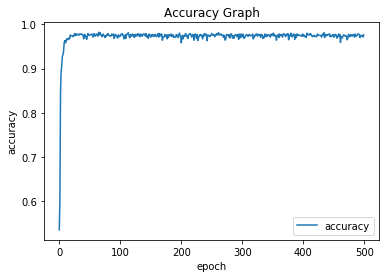

In [50]:
plt.plot(h.history['acc'])
plt.title('Accuracy Graph')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy'])

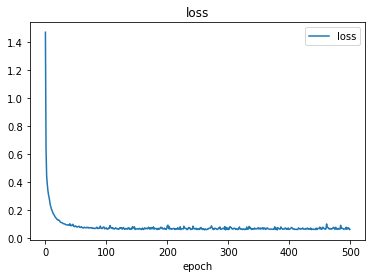

In [51]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [98]:
def plot_decision_boundary(X, y, model):
    # default is 50 anyway, no need to specify
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    # pair xx_ and yy_ column wise
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

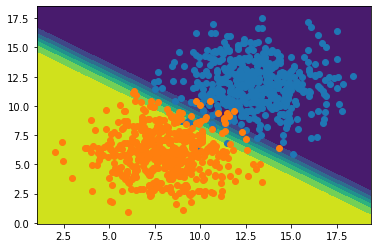

In [99]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])